# 1. 기본 분석 프로세스 살펴보기

## 1.1. 간단한 머신러닝

### 1.1.1. 필수 라이브러리 및 머신러닝 모듈의 적재

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier # 모듈을 특정하기 위해서

### 1.1.2. 데이터의 적재

In [3]:
iris = pd.read_csv('data/iris.data', header = None)

### 1.1.3. 데이터 확인 및 분석 사전 준비

In [4]:
iris.columns =['x1','x2','x3','x4','class']

In [5]:
iris[:5]

,x1,x2,x3,x4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = iris.values[:,:4]
X = X.astype('float32') # 위에서 dtype이 object로 되어 있으므로 명시적으로 type을 바꾸어야 함

In [7]:
y = iris.values[:,4]

In [8]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 1.1.4. 모델 설정

In [9]:
model = KNeighborsClassifier() # 기본 설정을 사용하는 것이다.

### 1.1.5. 지도학습 수행

In [10]:
model.fit(X,y) # X 특징, Y 분류 = 목표 = 정답, fit (<-훈련을 시키는 함수)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 1.1.6. 새로운 데이터를 모델에 적용하여 예측 

In [11]:
Xnew = np.array([[5.0, 2.9, 1.0, 0.2],[4.9, 3.0, 1.4, 0.2],[6.3, 2.7, 4.9, 1.8]]) # 붓꽃의 측정치 3개를 얻고, 이 데이터를 가진 붓꽃을 예측

In [12]:
model.predict(Xnew) # 예측하기

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

## 1.2. 탐색적 데이터 분석

### 1.2.1. 데이터의 확인

In [13]:
X[:5] # iris 데이터를 계속 사용한다

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

In [14]:
y[:5] # iris 데이터를 계속 사용한다

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### 1.2.2. 시각적 데이터 분석

In [15]:
x1 = X[:,0]
x3 = X[:,2]

col = np.where(y == 'Iris-setosa', 0, y) # class정보를 숫자로 치환 
col = np.where(col == 'Iris-versicolor', 1, col)
col = np.where(y == 'Iris-virginica', 2, col)

In [16]:
np.unique(col)

array([0, 1, 2], dtype=object)

#### 1.2.2.1. 산점도

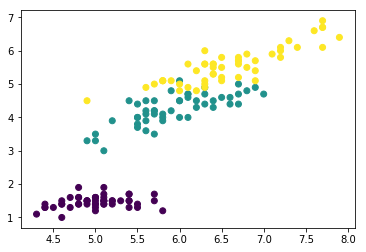

In [17]:
plt.scatter(x1, x3, c = col) # 2가지 변수를 골라서 2차원 산점도를 그린다

#### 1.2.2.2. 산점도 행렬

한 번에 두 개씩 모든 특성의 조합을 산점도로 출력 (기본 막대의 갯수는 10개)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208AB5B8EB8>,
      dtype=object)

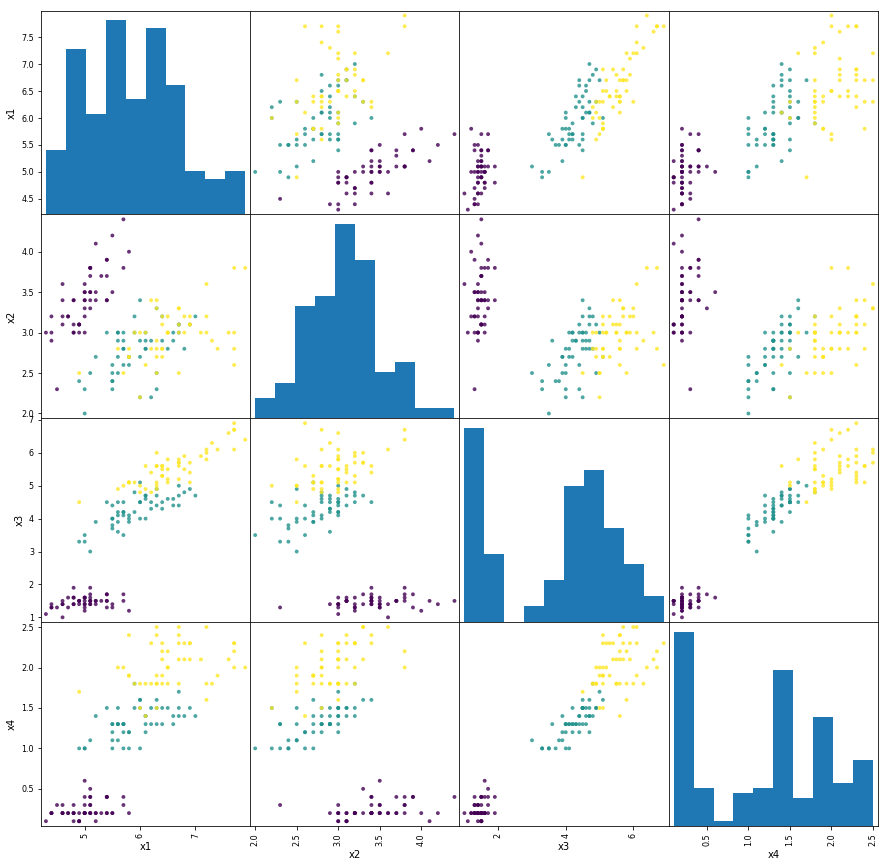

In [18]:
pd.plotting.scatter_matrix(iris, c = col, 
                           # hist_kwds = {'bins': 20}, # 막대의 갯수
                           figsize = (15,15) , s = 60, alpha = 0.8)

막대의 갯수를 20개로 세분화해서 산점도 행렬을 그린다

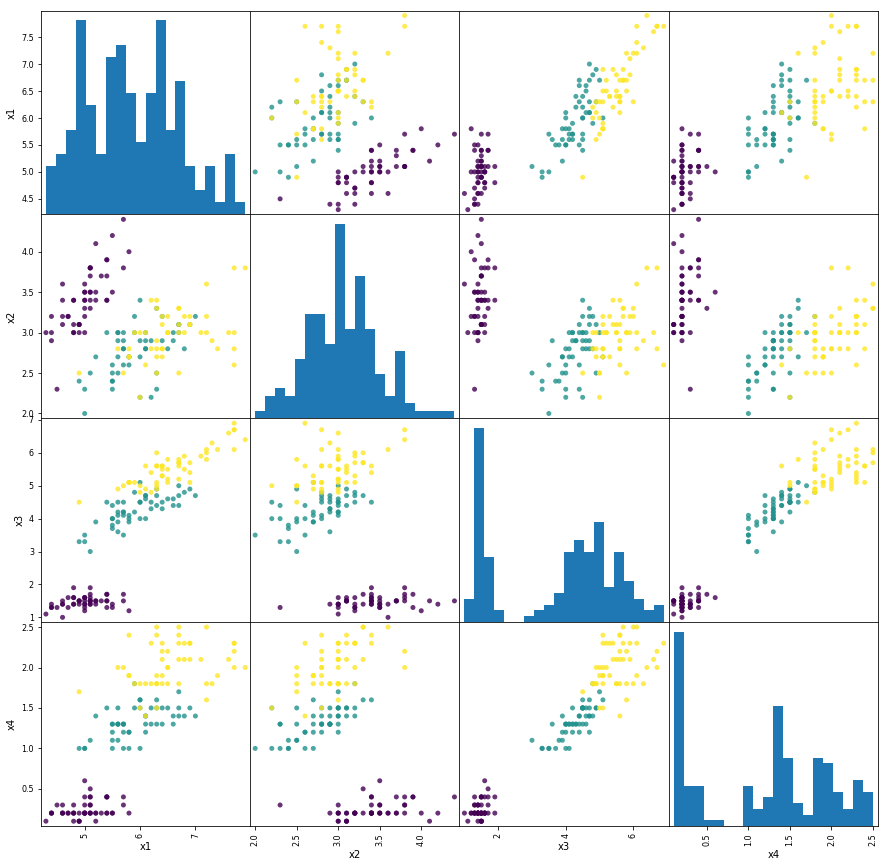

In [19]:
_ = pd.plotting.scatter_matrix(iris, c = col, 
                           hist_kwds = {'bins': 20}, 
                           figsize = (15,15) , s = 100, alpha = 0.8) # S 점의 크기, alpha = 투명도

* 위 그래프를 분석해보면

  1) 산점도 행렬로 각 Features를 2차원으로 조합해서 데이터의 분포, 다른 Feature와의 상관관계를 시각적으로 파악가능
  
  2) 데이터를 분류하는데 유용한 Feature는 무엇인지 알 수 있다.
  
  3) 보라색은 다른 것보다는 잘 분류되지만, 노란색과 초록색의 구분은 어려우므로 머신러닝이 아닌 IF/Then 과 같은 전통적인 알고리즘으로 분류하는 것은 어려울 것이다
  
  4) 차원이 많아지면 산점도 행렬로 그릴 수 없다.

### 1.2.3. 모델 설정

앞의 '1.1.4.'처럼 KNN 분석으로 분류를 하지만, 앞과는 달리 분류의 정확도도 계산할 것이다.

In [20]:
model = KNeighborsClassifier() # 기본 설정을 사용한 것이고, 아래에서 기본값이 무엇인지 알 수 있다

### 1.2.4. 모델 훈련 (지도학습)

In [21]:
model.fit(X,y) # 모델의 훈련 = fit , 지도학습인 이유는 label (y)를 제공해주기 때문...

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 1.2.5. 모델 활용 (예측)

어떤 학생이 바깥으로 나가서 iris 꽃을 발견하고 꽃잎, 꽃받침의 길이를 측정해왔고, 그 데이터로 모델에 적용해서 iris 품종을 예측하는 상황이라고 가정한다.

In [22]:
Xnew = np.array([[5.0, 2.9, 1.0, 0.2]]) # 새로운 붓꽃 데이터를 얻었다고 가정하고 (새로운 표본)

In [23]:
model.predict(Xnew)

array(['Iris-setosa'], dtype=object)

### 1.2.6. 모델 평가

모델의 성능은 여러 개의 표본으로 측정할 필요가 있으므로 (과대적합될 수 있는 단점이 있지만) 훈련했던 데이터 150개를 평가하는데 다시 활용해본다. 

In [24]:
y_pred = model.predict(X) #  모델을 만들었던 150개로 다시 예측을 하는 것

In [25]:
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [26]:
accu = np.mean(y==y_pred)  # 정확도
accu

0.9666666666666667

In [27]:
y[:5] # 알고 있는 class

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [28]:
y_pred[:5] # 예측한 값

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### 위 방법은 모델을 훈련한 데이터로 다시 예측을 하는데 사용했으므로, 모델이 과대적합되었을 가능성이 있다.

## 1.3. 과대적합 피하는 방법

### 1.3.1. 훈련과 시험 데이터의 분리

#### 주어진 데이터를 활용해서 모델을 훈련하고, 성능을 평가할 수 있는 데이터로 나눈다.

#### 데이터의 일부로 훈련(train)하고 다른 일부로 성능 평가(test)한다.

In [29]:
from sklearn.model_selection import train_test_split # 훈련, 시험 데이터의 분리

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle = True, test_size = 0.25, random_state = 0) 

 1) 원본 X는 건드리지 않고, train, test(25%)로 구분한다 <- 이 설정이 기본 설정
 
 2) shuffle이 중요 -> 훈련에서 보지 못한 데이터로 테스트를 해야하는 상황을 예방하기 위함 --> shuffle 이후 split을 한다
 
 3) X와 y를 통시에 shuffle하고 split해야 X와 y데이터가 엉뚱하게 shuffle되지 않는다
 
 4) random_state = 0는 교육 목적으로 쓰는 것이므로 실제에서는 쓰지 않는다

In [31]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape
  # 특징(feature)은 그대로 4개로 남아있는 것이 맞다, 샘플만 나뉘는 것

((150, 4), (112, 4), (38, 4), (150,), (112,), (38,))

### 1.3.2. 모델 훈련 및 평가

In [32]:
model.fit(X_train,y_train) # train 데이터로 모델 훈련을 하고

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_test_pred = model.predict(X_test)

In [34]:
y_test_pred[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [35]:
accu = np.mean(y_test==y_test_pred)  # 정확도 (샘플의 숫자가 증가하면 정확도의 분산이 줄어들 수 있다)
accu

0.9736842105263158

### 1.3.3. 일반화 성능 향상 (test 데이터로 정확도 평가)

훈련에 참여하지 않은 새로운 데이터로 모델의 정확도를 보는 것이 필요 --> '일반화 성능'을 고려하기 위함

실제값과 예측값을 비교하기 위해서 아래와 같이 실행

In [36]:
ya = pd.Series(y_test)  # 1차원 벡터형태의 자료를 표현할 때 사용
ya.name = 'y'
yh = pd.Series(y_test_pred)
yh.name = 'y_pred'
feat = pd.DataFrame({'Column1':X_test[:,0],'Column2':X_test[:,1], 'Column3':X_test[:,2],'Column4':X_test[:,3]})
pd.concat([feat, ya, yh], axis = 1) # 실제값과 예측값을 나란히 출력

,Column1,Column2,Column3,Column4,y,y_pred
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [37]:
def f_pred(feat, y, y_pred):
    ya = pd.Series(y_test) # 1차원 벡터형태의 자료를 표현할 때 사용
    ya.name = 'y'
    yh = pd.Series(y_test_pred)
    yh.name = 'y_pred'
    
    return pd.concat([feat, ya, yh], axis = 1)

feat = pd.DataFrame({'Column1':X_test[:,0],'Column2':X_test[:,1], 'Column3':X_test[:,2],'Column4':X_test[:,3]})
f_pred(feat, y, y_pred)

,Column1,Column2,Column3,Column4,y,y_pred
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


features와 실제값, 예측값을 데이터 한꺼번에 출력하는 기능을 함수로 처리하고 출력결과를 엑셀로 저장하기

In [38]:
def f_pred(feat, y, y_pred):
    ya = pd.Series(y_test) # 1차원 벡터형태의 자료를 표현할 때 사용
    ya.name = 'y'
    yh = pd.Series(y_test_pred)
    yh.name = 'y_pred'
    
    return pd.concat([feat, ya, yh], axis = 1)

feat = pd.DataFrame({'Column1':X_test[:,0],'Column2':X_test[:,1], 'Column3':X_test[:,2],'Column4':X_test[:,3]})
result_table = f_pred(feat, y, y_pred)

In [39]:
result_table.to_excel('result_table.xlsx') # 엑셀로 저장 --> accuracy = 0.9736842105263158

## 1.4. 첫 번째 회귀분석

### 1.4.1. 데이터 읽어오기

* 보스톤의 집값을 예측하기 위한 데이터 (Target변수 = Price)

* 분석의 유형은 회귀분석

In [40]:
boston = pd.read_csv('data/boston.csv') # boston지역의 부동산 데이터

### 1.4.2. 데이터 확인 (둘러보기)

In [41]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 1.4.3. 분석하기 위한 데이터 준비

#### 주어진 데이터셋을 지도학습용으로 준비한다

In [42]:
X = boston.values[:,1:].astype('float32')
y = boston.values[:,0].astype('float32')

#### train 데이터와 test 데이터로 나눈다

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 1.4.4. 탐색적 데이터 분석

#### 샘플 506개, 특징(features)이 13차원이므로 데이터의 시각화가 어렵다

In [44]:
X.shape, y.shape

((506, 13), (506,))

#### 범주형 데이터에서는 unique를 분석했지만, 회귀에서는 통계량을 얻을 수 있다.

In [45]:
y.min(), y.max(), y.mean()  # 분류에서는 np.unique(y)를 썼지만, 회귀에는 의미가 없다

(5.0, 50.0, 22.532806)

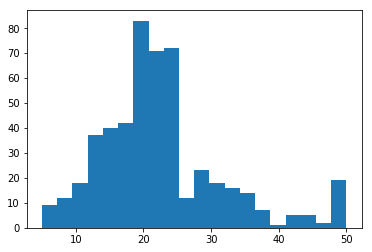

In [46]:
_ = plt.hist(y, bins= 20) # _ (밑줄 변수는 버리는 값을 의미한다. 보기싫은 정보를 제거하는 효과가 있다)

### 1.4.5. 모델 선택

#### 수치형 데이터의 예측값을 구하는 것이므로 회귀분석이 적절하다. 간단하게 실행해볼 수 있는 KNN을 적용해본다.

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
model = KNeighborsRegressor(n_neighbors=1) # (파리미터) 이웃의 숫자 

### 1.4.6. 모델 훈련

In [49]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

### 1.4.7. 예측

In [50]:
y_train_pred = model.predict(X_train)  # 훈련한 데이터를 다시 예측으로 사용해서 y_train_pred가 100으로 예측되는지를 본 것
y_test_pred = model.predict(X_test)    # 테스트 데이터로 평가를 한 것

In [51]:
y_test_pred[:5]  

array([41.3, 33. , 31.5, 16.6, 35.2], dtype=float32)

### 1.4.8. 모델 평가

### 회귀인 경우에는 평가지표가 분류와는 달라야 한다

#### 분류처럼 '실제값 = 예측값'인지 수행하면 문제가 있다. (연속적인 숫자이므로)
#### 이런 문제가 있다  (22.6 <> 22.7)

#### 1.4.8.1. 회귀용 평가지표

In [52]:
from sklearn.metrics import r2_score

In [53]:
train_score = r2_score(y_train, y_train_pred)  # 순서는 label이 앞에, 예측값이 뒤에 온다
test_score = r2_score(y_test, y_test_pred)
train_score, test_score

(1.0, 0.41156411611926713)

위 test_score를 보면 train score는 1.0인데 비해 test score가 0.41이어서 다른 방법을 고려해야할 필요가 있다 (과대적합)

회귀용 평가지표인 r2_score에 대한 도움말을 jupyter notebook의 도움말을 보는 방법은 다음과 같다

In [54]:
?r2_score

# '?'는 jupyter에서는 자기 관찰이라고 부른다

# Ch01. 끝.